# **USED CAR PRICE PREDICTION**

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

# Loading and Cleaning Data

In [3]:
#loading the data from csv file to pandas dataframe
df = pd.read_csv("car-dataset.csv")
df.head()

Car_Name  Year  Selling_Price  KMS_Driven Fuel_Type Seller_Type  \
0  Maruti Celerio  2016         675000       42000    Petrol  Individual   
1    Toyota Hilix  2003         900000       62000    Diesel  Individual   
2         Alto LX  2010         270000       95000    Petrol  Individual   
3          Santro  2008         300000       60000    Petrol  Individual   
4         Wagoner  2021         717000       80000    Petrol  Individual   

  Gear_Type        Owner  
0    Manual  First Owner  
1    Manual  First Owner  
2    Manual  First Owner  
3    Manual  First Owner  
4    Manual  First Owner

In [4]:
#checking the number of rows and columns
df.shape 

(4743, 8)

In [5]:
#provides summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4743 non-null   object
 1   Year           4743 non-null   int64 
 2   Selling_Price  4743 non-null   int64 
 3   KMS_Driven     4743 non-null   int64 
 4   Fuel_Type      4743 non-null   object
 5   Seller_Type    4743 non-null   object
 6   Gear_Type      4743 non-null   object
 7   Owner          4743 non-null   object
dtypes: int64(3), object(5)
memory usage: 296.6+ KB


In [6]:
#checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
KMS_Driven       0
Fuel_Type        0
Seller_Type      0
Gear_Type        0
Owner            0
dtype: int64

In [7]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Gear_Type.value_counts()) 
print(df.Seller_Type.value_counts()) 
print(df.Owner.value_counts()) 

Petrol      2392
Diesel      2287
CNG           40
LPG           23
Electric       1
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic     573
Name: Gear_Type, dtype: int64
Individual          3647
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64
First Owner             3193
Second Owner            1148
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64


In [8]:
#provides the uniques values of Gear_Type
df.Gear_Type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
#provides the uniques values of Fuel_Type
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [10]:
#provides the uniques values of Year
df.Year.unique()

array([2016, 2003, 2010, 2008, 2021, 2015, 2012, 2019, 2011, 2017, 2005,
       2009, 2018, 2000, 2022, 2020, 2014, 2013, 2006, 2004, 2002, 2007,
       1996, 1998, 1999, 2001, 1995, 1997, 1992], dtype=int64)

In [11]:
#dropping Car_Name and Seller_Type
#reindexing the columns and putting the dependent variable at the end
df1 = df.drop(['Car_Name', 'Seller_Type'],axis=1).reindex(['Year','Gear_Type', 'Fuel_Type', 'Owner', 'KMS_Driven', 'Selling_Price'],axis=1)
df1.head()

Year Gear_Type Fuel_Type        Owner  KMS_Driven  Selling_Price
0  2016    Manual    Petrol  First Owner       42000         675000
1  2003    Manual    Diesel  First Owner       62000         900000
2  2010    Manual    Petrol  First Owner       95000         270000
3  2008    Manual    Petrol  First Owner       60000         300000
4  2021    Manual    Petrol  First Owner       80000         717000

In [12]:
df1.isnull().sum()

Year             0
Gear_Type        0
Fuel_Type        0
Owner            0
KMS_Driven       0
Selling_Price    0
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Year vs Selling Price')

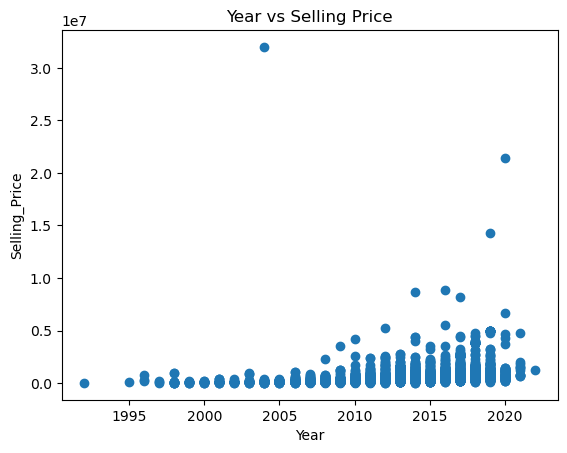

In [13]:
plt.scatter(x=df["Year"], y=df["Selling_Price"])
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.title("Year vs Selling Price")

Text(0.5, 1.0, 'Kilometer Driven vs Selling Price')

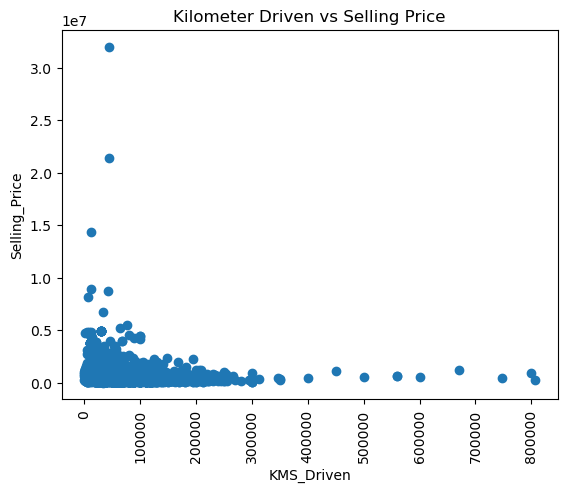

In [14]:
plt.scatter(x=df["KMS_Driven"], y=df["Selling_Price"])
plt.xlabel("KMS_Driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.title("Kilometer Driven vs Selling Price")

Text(0.5, 1.0, 'Fuel Type vs Selling Price')

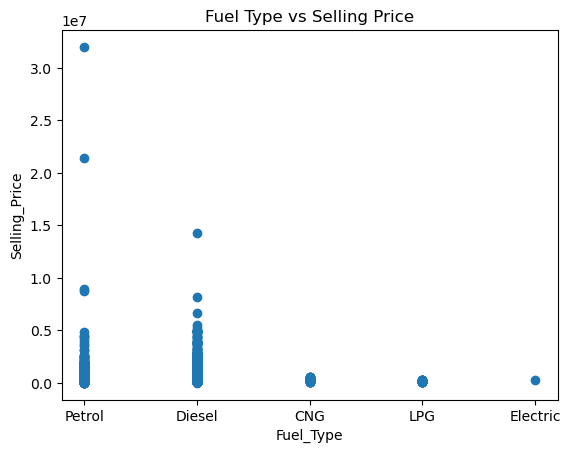

In [15]:
plt.scatter(x=df["Fuel_Type"], y=df["Selling_Price"])
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.title("Fuel Type vs Selling Price")

Text(0.5, 1.0, 'Gear Type vs Selling Price')

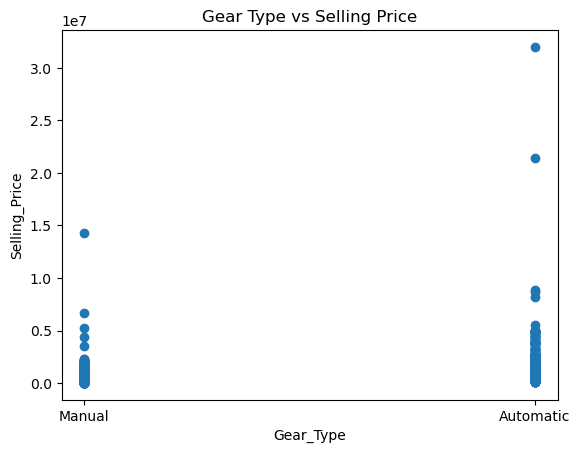

In [16]:
plt.scatter(x=df["Gear_Type"], y=df["Selling_Price"])
plt.xlabel("Gear_Type")
plt.ylabel("Selling_Price")
plt.title("Gear Type vs Selling Price")

Text(0.5, 1.0, 'Owner vs Selling Price')

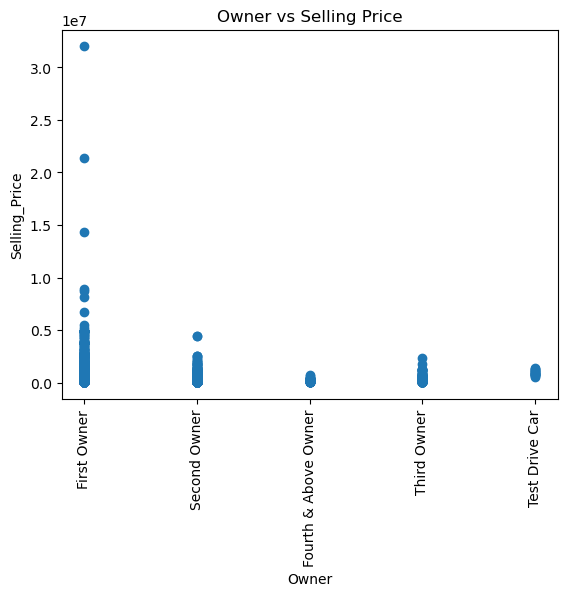

In [17]:
plt.scatter(x=df["Owner"], y=df["Selling_Price"])
plt.xlabel("Owner")
plt.xticks(rotation=90)
plt.ylabel("Selling_Price")
plt.title("Owner vs Selling Price")

### Manual and Automatic Cars

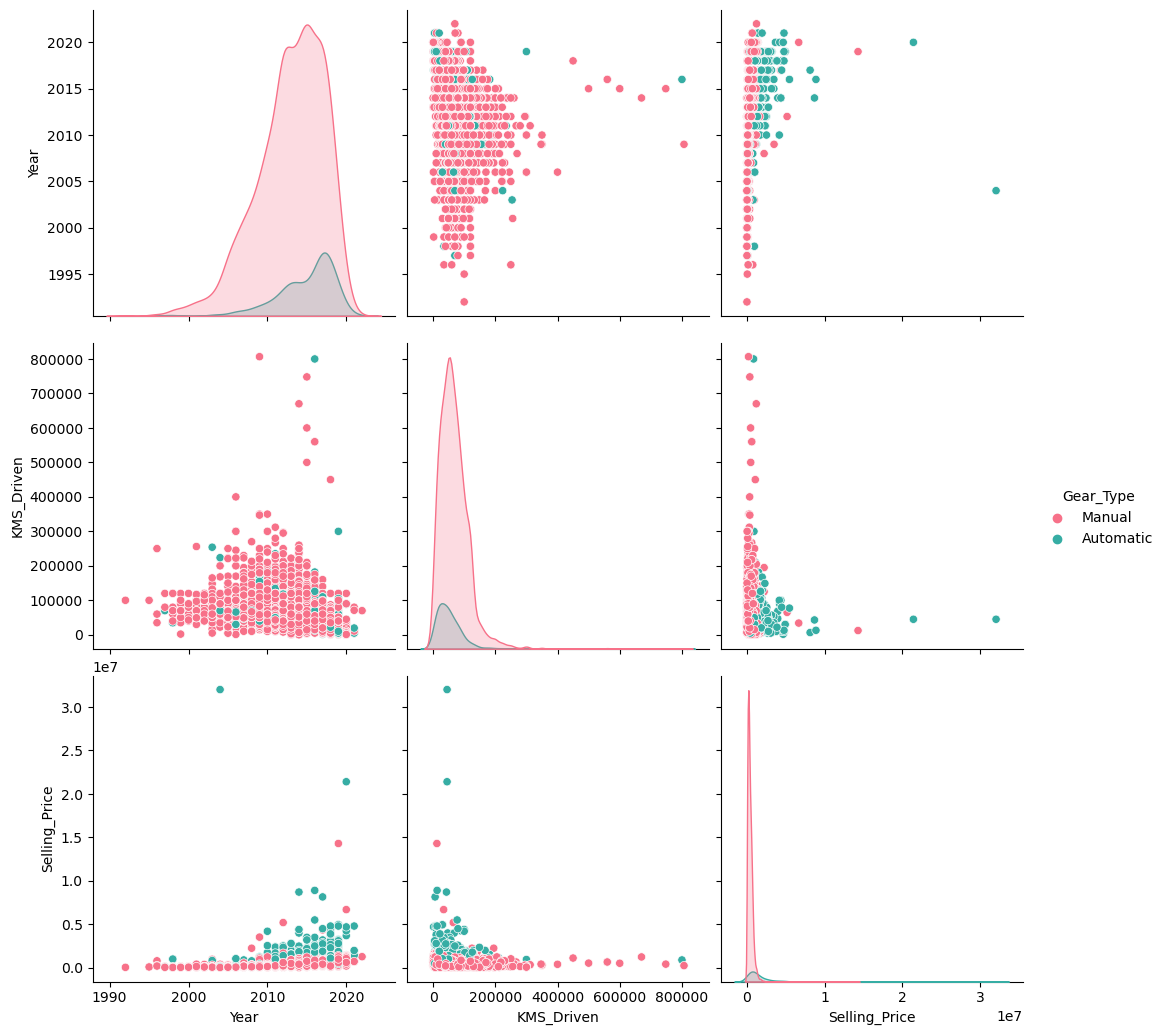

In [108]:
sns.pairplot(df1,hue = 'Gear_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic cars have higher price compared to manual type cars. There is an increase of automatic cars from 2010.

### Fuel Types

In [109]:
df1.Fuel_Type.value_counts()

Petrol      2392
Diesel      2287
CNG           40
LPG           23
Electric       1
Name: Fuel_Type, dtype: int64

Labelling other fuel types as Others since most of the data points are Petrol and Diesel.

In [110]:
df2 = df1
df2.Fuel_Type = df2.Fuel_Type.map(lambda x: x if x in ['Diesel','Petrol'] else 'Others')
df2.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'Others'], dtype=object)

In [111]:
manual = df2[df2['Gear_Type']=='Manual']
automatic = df2[df2['Gear_Type']=='Automatic']

Manual type car


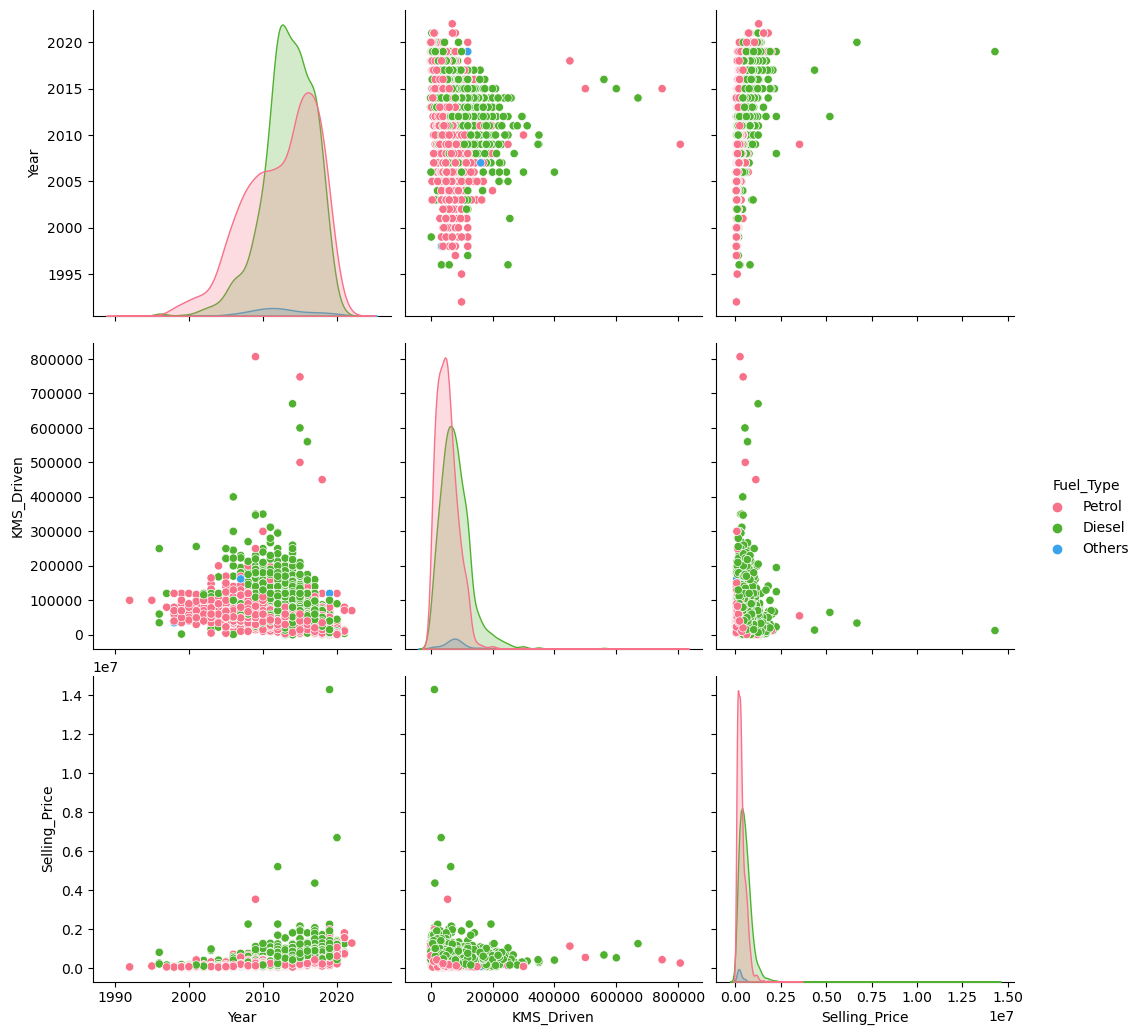

In [112]:
print('Manual type car')
sns.pairplot(manual,hue = 'Fuel_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic type car


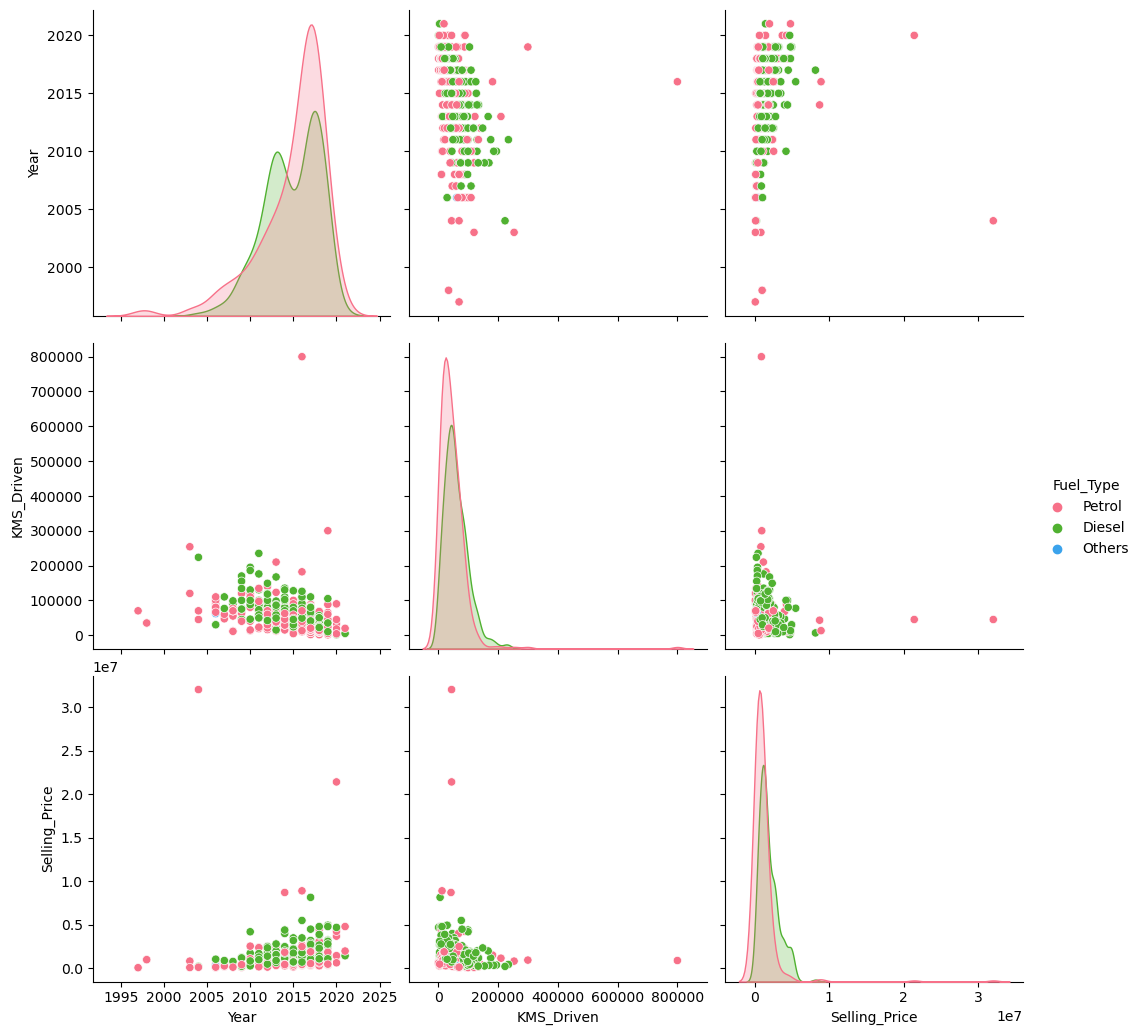

In [113]:
print('Automatic type car')
sns.pairplot(automatic,hue = 'Fuel_Type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Selling price of diesel type cars in both manual and automatic is more spread than petrol and other fuel.

### Owner

In [114]:
df2.groupby('Owner')[['KMS_Driven','Selling_Price']].agg(['count','mean']).applymap(lambda x: format(x,'.0f'))

KMS_Driven        Selling_Price        
                          count   mean         count    mean
Owner                                                       
First Owner                3193  56177          3193  652034
Fourth & Above Owner         81  99138            81  173901
Second Owner               1148  81447          1148  355503
Test Drive Car               17   4155            17  954294
Third Owner                 304  99305           304  269474

In [115]:
#dropping test drive cars and merging third owner and forth & above owner as third owner and above
df3 = df2[~(df2['Owner']=='Test Drive Car')]
df3.Owner = df3.Owner.map(lambda x: x if x in ['First Owner','Second Owner'] else 'Third Owner & Above')

df3['Owner'].value_counts()

First Owner            3193
Second Owner           1148
Third Owner & Above     385
Name: Owner, dtype: int64

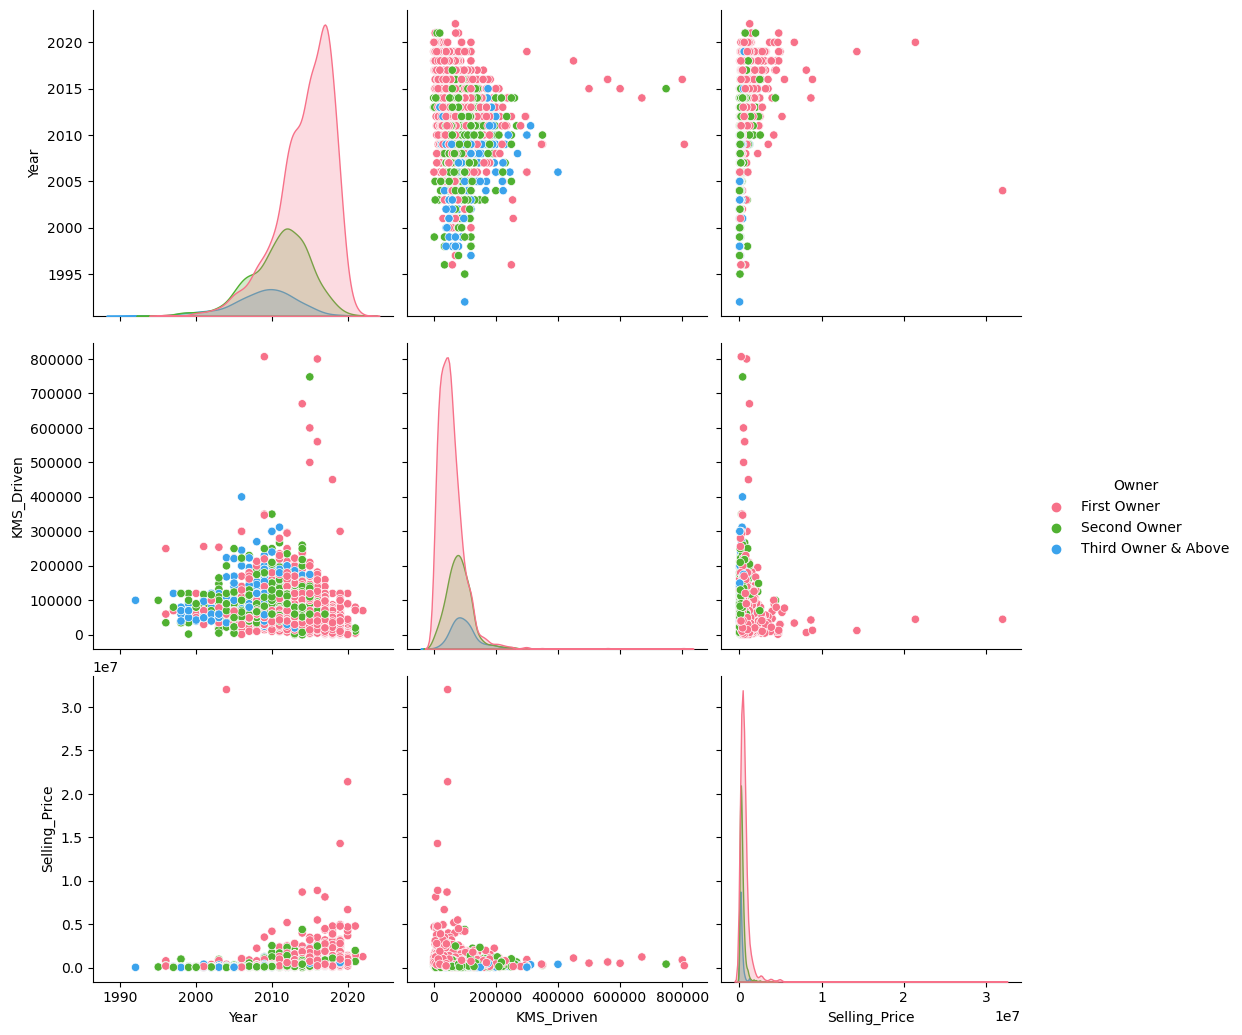

In [116]:
sns.pairplot(df3,hue = 'Owner',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show() 

Cars sold by first owner have higher price than the rest.

# Outlier Detection and removing using IQR method

In [117]:
df3.groupby('Gear_Type').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['Year'],axis=1)

KMS_Driven                      Selling_Price                  \
                mean    std   min     max          mean      std    min   
Gear_Type                                                                 
Automatic      52171  49869  1100  800000       1453576  1963962  79000   
Manual         67706  50213     1  806599        422394   396708  11384   

                     
                max  
Gear_Type            
Automatic  32000000  
Manual     14295679

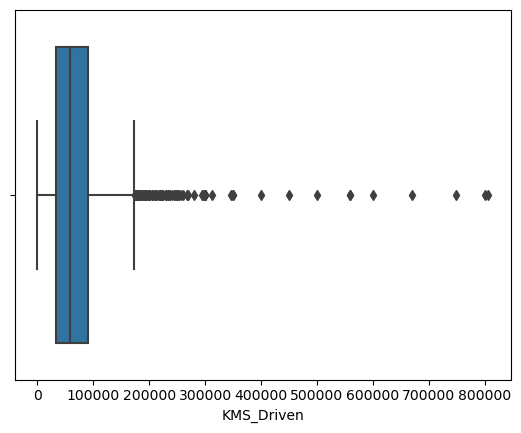

In [118]:
sns.boxplot(x = df3['KMS_Driven'])
plt.show()

In [119]:
#removing outliers in kms driven 
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    df_km_driven = df['KMS_Driven']

    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df4 = remove_outlier_km_driven(df3)

In [120]:
sns.boxplot(x = df3['Selling_Price'])
plt.show()

In [121]:
#removing outliers in selling price by gear type and year 
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.Year.unique()):
        year_price_manual = df[(df['Year']==year) & (df['Gear_Type']=='Manual')]['Selling_Price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['Year']==year) & (df['Gear_Type']=='Automatic')]['Selling_Price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df5 = remove_outlier_selling_price(df4)

In [122]:
year_mean_manual = df5[df5['Gear_Type']=='Manual'].groupby('Year')['Selling_Price'].mean()
year_mean_automatic = df5[df5['Gear_Type']=='Automatic'].groupby('Year')['Selling_Price'].mean()

In [123]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [124]:
#removing datapoints before 2005 since it produces inconsistency and the data points below 2000 have low value count
df6 = df5[df5['Year']>2005]

In [125]:
year_mean_manual_price = df6[df6['Gear_Type']=='Manual'].groupby('Year')['Selling_Price'].mean()
year_mean_automatic_price = df6[df6['Gear_Type']=='Automatic'].groupby('Year')['Selling_Price'].mean()
year_mean_manual_km = df6[df6['Gear_Type']=='Manual'].groupby('Year')['KMS_Driven'].mean()
year_mean_automatic_km = df6[df6['Gear_Type']=='Automatic'].groupby('Year')['KMS_Driven'].mean()

In [126]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year')
ax[0][0].set_ylabel('Selling Price')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year')
ax[0][1].set_ylabel('Selling Price')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year')
ax[1][0].set_ylabel('Kilometer driven')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year')
ax[1][1].set_ylabel('Kilometer driven')

plt.show()

# Removing suspicious datapoints

Since the average selling price of cars increases each year whereas average kilometer driven by the car should be atleast lower than the average kilometer driven last year, we will be removing manual and automatic cars whose kilometer driven is greater than the average kilometer driven last year but having lower selling price compared to the average price last year.


In [37]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    years = sorted(df.Year.unique())
    for i in range(1,len(years)):
        df_year = df[(df['Year']==years[i])&(df['Gear_Type']=='Manual')]
        last_mean_km_driven = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Manual')]['KMS_Driven'].mean()
        last_mean_selling_price = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Manual')]['Selling_Price'].mean() 
        df_outlier = df_year[(df_year['KMS_Driven']>last_mean_km_driven)&(df_year['Selling_Price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier])
        
        df_year = df[(df['Year']==years[i])&(df['Gear_Type']=='Automatic')]
        last_mean_km_driven = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Automatic')]['KMS_Driven'].mean()
        last_mean_selling_price = df[(df['Year']==years[i-1])&(df['Gear_Type']=='Automatic')]['Selling_Price'].mean() 
        df_outlier = df_year[(df_year['KMS_Driven']>last_mean_km_driven)&(df_year['Selling_Price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier]) 
    return df.drop(temp.index)
    
df7 = remove_outlier_last_year(df6)

Removing inconsistencies in selling price based on number of previous owner. If the second owner offers lower selling price than the average selling price of third owner, those data points will be removed. The same removal procedure is also done with first and second owners based on year.

In [38]:
def remove_outlier_owner(df):
    temp = pd.DataFrame()
    for a in sorted(df.Year.unique()):
        for b in ['Manual','Automatic']:
            df_year = df[(df['Year']==a)&(df['Gear_Type']==b)]
            second_mean = df_year[df_year['Owner']=='Second Owner']['Selling_Price'].mean()
            third_mean = df_year[df_year['Owner']=='Third Owner & Above']['Selling_Price'].mean()
            df_outlier = df_year[((df_year['Owner']=='Second Owner')&(df_year['Selling_Price']<third_mean)) | ((df_year['Owner']=='First Owner')&(df_year['Selling_Price']<second_mean))]
            temp = pd.concat([temp,df_outlier])
    return df.drop(temp.index)
    
df8 = remove_outlier_owner(df7)

Removing data points with low kilometers driven but also having low selling price and data points with high kilometers driven and high selling price as well.

In [127]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    for i in sorted(df.Year.unique()):
        df_year = df[df['Year']==i]
        km = df_year['KMS_Driven']
        price = df_year['Selling_Price']
        outlier = df_year[(df_year['KMS_Driven']<km.mean()-km.std())&(df_year['Selling_Price']<price.mean()-price.std()) | (df_year['KMS_Driven']>km.mean()+km.std())&(df_year['Selling_Price']>price.mean()+price.std())]
        temp = pd.concat([temp,outlier])

    return df.drop(temp.index)
    
df9 = remove_outlier_last_year(df8)

In [128]:
df9.shape

(1954, 6)

In [129]:
df9.head()

Year Gear_Type Fuel_Type        Owner  KMS_Driven  Selling_Price
0  2016    Manual    Petrol  First Owner       42000         675000
2  2010    Manual    Petrol  First Owner       95000         270000
3  2008    Manual    Petrol  First Owner       60000         300000
8  2016    Manual    Diesel  First Owner       38000         670000
9  2015    Manual    Petrol  First Owner       83000         500000

In [130]:
X = df9.iloc[:, :5]
y = df9.iloc[:, -1]

In [131]:
print(X)

      Year Gear_Type Fuel_Type        Owner  KMS_Driven
0     2016    Manual    Petrol  First Owner       42000
2     2010    Manual    Petrol  First Owner       95000
3     2008    Manual    Petrol  First Owner       60000
8     2016    Manual    Diesel  First Owner       38000
9     2015    Manual    Petrol  First Owner       83000
...    ...       ...       ...          ...         ...
4722  2012    Manual    Diesel  First Owner       70000
4725  2013    Manual    Diesel  First Owner      120000
4735  2015    Manual    Diesel  First Owner      120000
4737  2012    Manual    Diesel  First Owner      170000
4741  2016    Manual    Diesel  First Owner       90000

[1954 rows x 5 columns]


# Train test split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5, shuffle=True)

# Creating Pipeline

In [133]:
#Pipeline creates a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [134]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Year', 'KMS_Driven'], dtype='object')
Index(['Gear_Type', 'Fuel_Type', 'Owner'], dtype='object')


In [135]:
n_index = [X.columns.get_loc(col) for col in numeric_cols]
n_index

[0, 4]

In [136]:
c_index = [X.columns.get_loc(col) for col in categorical_cols]
c_index

[1, 2, 3]

In [137]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputerN',SimpleImputer(strategy='median')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )

categorical_transformer = Pipeline(steps = [
    ('imputerC', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [138]:
#Combine the numeric and categorical transformers
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers = [
                ('num',numeric_transformer,n_index),
                ('cat',categorical_transformer,c_index)
]) 

# KNeighborsRegressor 

In [151]:
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor()

In [152]:
pipelinemodellr = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('est', model1)  #Model
    ]
)

In [153]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodellr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3])])),
                ('est', KNeighborsRegressor())])

In [154]:
from sklearn.model_selection import GridSearchCV

#Parameters to hypertune for KNeighborClassifier

n_neighbors_param = [1,2,3,4,5,6,7,8]
# print(n_neighbors_param)
leaf_size_param = list(range(30,60,10))
weights_param = ['uniform', 'distance']
algorithm_param =['auto', 'ball_tree', 'kd_tree', 'brute']

#Pack these params into a dictionary

grid_params_knn = [
  {
    'est__n_neighbors' : n_neighbors_param,
    'est__leaf_size'   : leaf_size_param,  
    'est__weights'     : weights_param,
    'est__algorithm'   : algorithm_param,
  }
]

gs_knn_pipeline = GridSearchCV(estimator=pipelinemodellr,
                               param_grid = grid_params_knn,
                               scoring = 'accuracy',
                               cv = 10
                               )

#Fit the GridSearchCV to find the best model from the hyperparameter tuning 
gs_models = gs_knn_pipeline.fit(X_train, y_train) 

In [175]:
y_pred_hyp = pipelinemodellr.predict(X_test)

In [176]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred_hyp)
print("r2: {}".format(lin_r2))

r2: 0.8442562603163665


In [177]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred_hyp, y_test)
lin_smse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))
print("smse: {}".format(lin_smse)) 

mse: 58622861358.19485
smse: 242121.58383381445


In [178]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred_hyp, y_test)
print("mae: {}".format(lin_mae)) 

mae: 127999.39304703477


In [156]:
pipelinemodellr.score(X_train,y_train) 

0.8880737977677642

In [157]:
pipelinemodellr.score(X_test,y_test) 

0.8442562603163665

# SVR 

In [139]:
model = svm.SVR(kernel='rbf',C=10000000,gamma='scale')

In [52]:
#Assemble the individual blocks to form the main pipeline
pipelinemodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('est', model)  #Model
    ]
)

In [53]:
type(X_train)

pandas.core.frame.DataFrame

In [54]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3])])),
                ('est', SVR(C=10000000))])

In [55]:
pipelinemodel.score(X_train,y_train)

0.8078303320519908

In [56]:
pipelinemodel.score(X_test,y_test) 

0.8048918317122085

In [57]:
y_pred = pipelinemodel.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

r2: 0.8048918317122085


In [59]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

mse: 270997.9045031093


# Decision Tree 

In [163]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=12)

In [164]:
#Assemble the individual blocks to form the main pipeline
pipelinemodeldr = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('est', model2)  #Model
    ]
)

In [165]:
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodeldr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3])])),
                ('est', DecisionTreeRegressor(max_depth=12))])

In [166]:
pipelinemodeldr.score(X_train,y_train)

0.981074065877819

In [167]:
pipelinemodeldr.score(X_test,y_test)

0.7821825182768829

# Linear Regression 

In [169]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression() 

In [170]:
#Assemble the individual blocks to form the main pipeline
pipelinemodell = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('est', model3)  #Model
    ]
) 

In [171]:
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodell.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3])])),
                ('est', LinearRegression())])

In [172]:
pipelinemodell.score(X_train,y_train)

0.6507643387346664

In [173]:
pipelinemodell.score(X_test,y_test)

0.6642284037262278

In [168]:
X_test  

Year  Gear_Type Fuel_Type                Owner  KMS_Driven
4171  2013     Manual    Petrol          First Owner       50000
4402  2015     Manual    Petrol          First Owner       25000
3963  2012     Manual    Diesel         Second Owner      126000
1559  2017  Automatic    Diesel          First Owner       30000
3095  2012     Manual    Diesel          First Owner       70000
...    ...        ...       ...                  ...         ...
1326  2016     Manual    Petrol          First Owner        7104
146   2016  Automatic    Petrol          First Owner       65000
2902  2011  Automatic    Diesel         Second Owner      100000
2832  2011     Manual    Diesel  Third Owner & Above      120000
2524  2013     Manual    Diesel         Second Owner       78000

[489 rows x 5 columns]

In [61]:
y_test

4171     500000
4402     850000
3963     625000
1559    2400000
3095     400000
         ...   
1326     670000
146     1482389
2902    1700000
2832     350000
2524     325000
Name: Selling_Price, Length: 489, dtype: int64

# Saving Model

In [91]:
import pickle
pickle.dump(pipelinemodellr, open("used_car_price_model.pickle", "wb"))

In [92]:
#load pickle model
model = pickle.load(open("used_car_price_model.pickle","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3])])),
                ('est', KNeighborsRegressor())])

In [90]:
model.predict(X_test)

array([ 414000. ,  625000. ,  368000. , 2765000. ,  527000. ,  620000. ,
        625000. ,  249999.8, 1120000. , 1580000. ,  891999.6,  654899.8,
        395539.8,  760000. ,  454800. ,  570999.6,  441000. ,  346686. ,
        750646.6,  290000. ,  570999.6,  600000. ,  341000. ,  335000. ,
        175000. ,  619000. ,  759200. ,  409600. ,  470160. ,  562000. ,
        460000. ,  886400. ,  674200. ,  895000. , 2080000. ,  316000. ,
        491400. ,  625000. ,  740000. ,  491000. ,  575000. ,  694000. ,
        360000. ,  644890.2,  832000. , 1340197.2,  276000. ,  184000. ,
        519200. ,  683000. ,  489000. ,  206000. ,  526000. ,  520000. ,
        680000. , 4950000. ,  328000. , 2600000. ,  234600. ,  793200. ,
        579999.8, 1349926.8,  437999.8,  727800. ,  702000. ,  324999.8,
        262000. , 2785000. ,  287400. ,  420000. ,  621400. ,  232000. ,
        346686. ,  200000. ,  626000. ,  925653.2, 1220999.2,  240000. ,
        262000. , 2175000. ,  750000. ,  760000. , 

In [65]:
X_train

Year  Gear_Type Fuel_Type                Owner  KMS_Driven
1815  2017     Manual    Petrol          First Owner       23000
4471  2016     Manual    Diesel          First Owner       58000
895   2011     Manual    Diesel         Second Owner      100000
4570  2012     Manual    Petrol  Third Owner & Above       70000
2186  2013     Manual    Diesel  Third Owner & Above       70000
...    ...        ...       ...                  ...         ...
2702  2017  Automatic    Petrol          First Owner       20118
2309  2015     Manual    Diesel          First Owner       92621
4244  2015     Manual    Diesel          First Owner       60000
436   2018     Manual    Petrol          First Owner       14500
1981  2015     Manual    Diesel  Third Owner & Above       70000

[1465 rows x 5 columns]

In [66]:
y_train

1815     650000
4471     825000
895      450000
4570     250000
2186     430000
         ...   
2702    1900000
2309     455000
4244     495000
436      930000
1981     450000
Name: Selling_Price, Length: 1465, dtype: int64

THANK YOU!